## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Display plots inline and change default figure size
%matplotlib inline

## Task 1 : Neural Network Approach to Logistic Regression

### Logistic Regression - breif discussion 
1. Logistic Regression despite of name, is mainly used for classification. Logistic regression calculates maximum likelihood of the target variable or negative logloss to classify it in one of the class using sigmoid function.<br>
2. Logistic regression uses loss function to tune the model parameters such as weights and biases. The loss function is descrbed in the algorithm below.<br>
3. Here in this task, we will develope a single layer neural network approach to logistic regression, which has input layer with nodes equal to number of features in dataset. There is only one node in output layer which gives out prediction or 'y_cap' of a class from inout feature vector.<br>
4. The development of my algorithm is as follows -<br>
    a. Initialize learning rate and number of iterations while instantiating the model or class. I have developed normal gradient descent, so there is no batching of samples.<br>
    b. Define sigmoid function with given formulae.<br>
    c. Define fit function to train your model, where you initially instantiate weight to an array of zeros which has size equal to number of input features by nodes in output layer. We initialize bias to 0, as there is only one layer, so 1 bias will work.<br>
    d. Define and store loss in a list<br>
    e. backpropogate and find the partial dervatives of weight and bias<br>
    f. update weights and bias<br>
5. The predict function is basically forward propogation, which will give out predicted value on test data<br>
6. Store it and find accuracy on various datasets provided<br>

### References for task 1 :
1. Major reference is my submission of assignment 2 of machine learning, where i submitted the LR from scratch. Changes are done here accordingly for NN style implementation.<br>
2. Slides and lectures by Prof. Michael Madden<br>
3. https://medium.com/analytics-vidhya/logistic-regression-using-single-layer-perceptron-neural-network<br>
4. https://www.datasciencecentral.com/logistic-regression-as-a-neural-network/<br>

In [2]:
class LogRegression():
    #Initializing hyperparameters of algorithm (LR and Number of Iterations)
    def __init__(self, lRate, no_of_iterations):
        self.lRate = lRate
        self.no_of_iterations = no_of_iterations
    
    #Defining sigmoid function as an activation function
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    #Function to fit / train the module and adjust weights and bias with the help of Gradient descent
    def fit(self, X, Y):
        m = X.shape[1] #storing number of examples of data
        n = X.shape[0] #storing number of features in dataset

        W = np.zeros((n,1)) #Initializing weights to 0 for all features
        B = 0  #declaring global bias as 0 as there is only 1 layer 

        loss_list = [] #List of costs per iteration

        for i in range(self.no_of_iterations):
            Z = np.dot(W.T, X) + B # Basic hypothesis
            A = self.sigmoid(Z) # Defining activation function

            # negative log loss calculation 
            loss = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

            # Gradient Descent i.e. derivative of change in weights and bias from backpropagation
            dW = (1/m)*np.dot(A-Y, X.T) #partial derivative of change in weight 
            dB = (1/m)*np.sum(A - Y) #partial derivative of change in bias 

            #updating weights and bias with backprop
            W = W - self.lRate*dW.T 
            B = B - self.lRate*dB

            # Keeping track of our loss function value
            loss_list.append(loss) # storing costs per iteration

            #prinitng the coast at every 1000th iteraion
            if(i%(self.no_of_iterations/10) == 0):
                print("loss after ", i, "iteration is : ", loss)
        plt.plot(loss_list)
        plt.ylabel("Loss")
        plt.xlabel("Iterations")
        plt.title("Loss per Interation")
        plt.show()
        
        return W, B, loss_list      

    #Prediction function to predict the new sample i.e forward prop
    def predict(self, X, Y, W, B):
       Z = np.dot(W.T, X) + B
       y_pred = self.sigmoid(Z)
       y_pred = np.where(y_pred > 0.5, 1, 0)
       return y_pred


## Task 2 : Runing the Logisitc Refression on given data

### Results and obeservations on task 2 :
1. The single layer logistic regression approach gives out great accuracy on blobs300 dataset, which is linearly separable. Accuracy is 100%.<br>
2. I performed various experiments with many hyper parameteres but the ones which are reducing the loss and giving out best results have very low learning rate and large number of iterations.<br>
3. The single layer logistic regression gives out around 40-50 percent accuracy on circles600 dataset which not linearly separable. Here as well, after multiple experiments on test data, the hyperparameters were set to low learning rate of 0.015 and high number of iterations i.e. 100000.<br>
4. The dataset is read by the code given by Prof. Michael Madded in assignment 1, and is splitted in 70-15-15 fashion for train, test and validation respectively by using scikit learns train test split.<br>
5. Further the dataframes are trasposed to the shape such as the vectors can be multiplied.<br>
<br>
### Refrences for task 2:<br>
1. My assignment 2 of machine learning module last semester<br>
2. Code provided by Prof. Michael Madded <br>
3. Scikit learn documenttaion on train_test_split<br>

### 1. Blob Dataset 

In [3]:
# Reading the Dataset with pandas - Blob datase
df = pd.read_csv("E:\College Wiki\Deep Learning\Assignment 1\\blobs300.csv")
#Storing labels in Y
Y = df['Class'].values
#Storing features in X by deleting 'Class; column
del df['Class']
#Storing features
X = df.values 

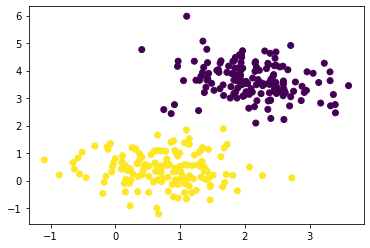

In [4]:
#Plotting scatterplot
plt.scatter(X[:,0], X[:,1], c=Y) 

In [5]:
#Splitting the dataset in train - test - validations dataset as 70 - 15 -1 5 percent respectively
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [6]:
#Reshaping the datasets with transpose for matrix multiplications during updating weights and activation functions 
x_train = x_train.T
y_train = y_train.reshape(1, x_train.shape[1])
x_test = x_test.T
y_test = y_test.reshape(1, x_test.shape[1])
x_val = x_val.T
y_val = y_val.reshape(1, x_val.shape[1])

In [7]:
print("Shape of X_train : ", x_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", x_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (4, 210)
Shape of Y_train :  (1, 210)
Shape of X_test :  (4, 45)
Shape of Y_test :  (1, 45)


loss after  0 iteration is :  0.6931471805599453
loss after  10000 iteration is :  0.08375720594259699
loss after  20000 iteration is :  0.05561240225156176
loss after  30000 iteration is :  0.04431304709101157
loss after  40000 iteration is :  0.03792308183672042
loss after  50000 iteration is :  0.03370574572209898
loss after  60000 iteration is :  0.030663511828437063
loss after  70000 iteration is :  0.028338082243238957
loss after  80000 iteration is :  0.02648663598738998
loss after  90000 iteration is :  0.02496733488337936


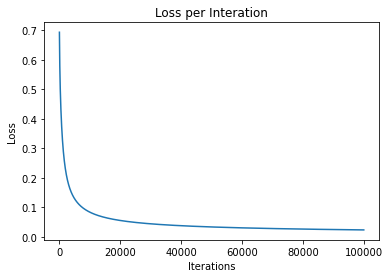

In [8]:
# Running the model on data after tuning the hyperparameters on the test data 
model = LogRegression(lRate = 0.0015, no_of_iterations = 100000)
W, B, loss_list = model.fit(x_train,y_train)


### Predictions and Accuracy on Validation data for Blobs

In [9]:
# Prediction on validation data after successful run on test data
validation = model.predict(x_val,y_val,W,B)

In [10]:
# Accuracy on blob dataset is 100% on validation dataset
print("Accuracy of validation set on blobs Dataset by single layer logistic regresison: ",accuracy_score(y_val, validation) * 100)

Accuracy of validation set on blobs Dataset by single layer logistic regresison:  100.0


### Circles Dataset

In [11]:
# Reading the Dataset with pandas - Blob datase
df = pd.read_csv("E:\College Wiki\Deep Learning\Assignment 1\\circles600.csv")
#Storing labels in Y
Y = df['Class'].values
#Storing features in X by deleting 'Class; column
del df['Class']
#Storing features
X = df.values 

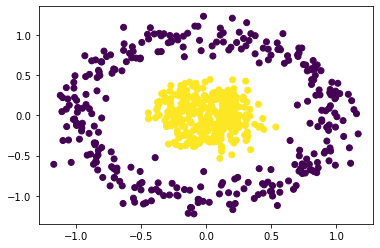

In [12]:
#Plotting scatterplot
plt.scatter(X[:,0], X[:,1], c=Y) 

In [13]:
#Splitting the dataset in train - test - validations dataset as 70 - 15 -1 5 percent respectively
x_train_circ, x_rem_circ, y_train_circ, y_rem_circ = train_test_split(X, Y, train_size=0.7)
x_val_circ, x_test_circ, y_val_circ, y_test_circ = train_test_split(x_rem_circ, y_rem_circ, test_size=0.5)

In [14]:
# Transforming np arrays into correct shape for further calculations
x_train_circ = x_train_circ.T
y_train_circ = y_train_circ.reshape(1, x_train_circ.shape[1])
x_test_circ = x_test_circ.T
y_test_circ = y_test_circ.reshape(1, x_test_circ.shape[1])
x_val_circ = x_val_circ.T
y_val_circ = y_val_circ.reshape(1, x_val_circ.shape[1])

In [15]:
print("Shape of X_train : ", x_train_circ.shape)
print("Shape of Y_train : ", y_train_circ.shape)
print("Shape of X_test : ", x_test_circ.shape)
print("Shape of Y_test : ", y_test_circ.shape)

Shape of X_train :  (2, 420)
Shape of Y_train :  (1, 420)
Shape of X_test :  (2, 90)
Shape of Y_test :  (1, 90)


loss after  0 iteration is :  0.6931471805599453
loss after  10000 iteration is :  0.6916781646663365
loss after  20000 iteration is :  0.6916781646663365
loss after  30000 iteration is :  0.6916781646663365
loss after  40000 iteration is :  0.6916781646663365
loss after  50000 iteration is :  0.6916781646663365
loss after  60000 iteration is :  0.6916781646663365
loss after  70000 iteration is :  0.6916781646663365
loss after  80000 iteration is :  0.6916781646663365
loss after  90000 iteration is :  0.6916781646663365


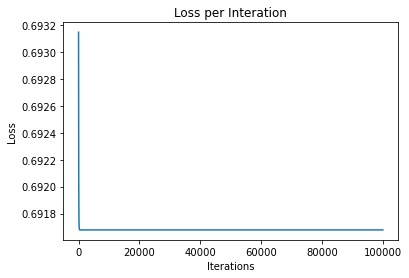

In [16]:
# Running the model on data after tuning the hyperparameters on the test data 
model2 = LogRegression(lRate = 0.15, no_of_iterations = 100000)
W, B, loss_list = model2.fit(x_train_circ,y_train_circ)

In [17]:
circles_test = model2.predict(x_test_circ, y_test_circ, W, B)

In [18]:
# Accuracy on circle dataset
accuracy = accuracy_score(y_val_circ.reshape(len(y_val_circ[0]),), circles_test.reshape(len(y_val_circ[0]),))

In [19]:
print("Accuracy on validation set of Circle Dataset with Single layer Logistic Regression: ",accuracy*100)

Accuracy on validation set of Circle Dataset with Single layer Logistic Regression:  57.77777777777777


## Task 3: Shallow Neural Network for Logistic Regression

### Brief Description of Algorithm :

1. The shallow neural network implementation of logistic regression contains 3 layers precisely. The first layer is an input layer, same as mentioned above it has the number of nodes equal to the number of features of dataset. The second layer is a hidden layer and can have n number of nodes which is a hyperparameter to provide. Then there is an output layer consisting only one node.<br>
2. The activation function used for both layers is a sigmoid function which is explained previously. <br>
3. The key difference here is we will have an extra layer and hence the extra weights and biases to change when we backpropagate the error to tune model parameteres such as weight and bias. This was not the case in previous or single-layer perceptron implementation of Logistic Regression.<br> 
4. The expectation from this implementation is that, it will have greater accuracy even on non-linear dataset of circles600.<br>
5. The development steps of my algorithm is as follows:<br>
    a. We first assign the number of nodes to input layer (number of features), hidden layer and output layer(single node in this case.)<br>
    b. Based on those, we call intialize function which will intiallize and create a vector for weights and biases. FOr example, W1 given below, will have values in marix of hidden layer * input layer, which is 4 * 4 for blobs dataset. The bias b1 will have the dimenstions of hidden Layer * 1 which is 4 * 1. We assign random values to whole matrix of both weight and bias and multiply it by 0.01 so that we get a really small number as initial values of weight and bias.<br>
    Similar will be the case for W2 and b2 with the parameters mentioned in the code.<br>
    We save the parameters in a dictionary for using and return it.<br>
    c. We define a sigmoid function as out activation function for both the layers.<br>
    d. Now, we propogate forward, giving the function feature subset and weights and bisases we stored. In forward prop function we locally save the values coming from the dictionary to calulate Aactivations from both the layers i.e. A1 and A2 respectively. We save A1, Z1, A2 and Z2 in another dictionary and return it.<br>
    e. After propogating forwards, we will have the predicted values and we can calculate the difference, i.e. the loss to tune our weights and biases.<br>
    f. We agian store weigts and output values from activation functions A1 and A2 locally, then we will calulate the difference at first layer with the partial derivatives of weights and biases as mentioned below in the code. We now have the difference in parameteres, which again, we will store in a dictionary and return it.<br>
    g. As we have the difference, we will tune our weights and biases in change_weights function with the similar formula used in previous version of logistic regression explained above. We now have updated weights, which we will store in our dictionary which holds weights and biases to be propageted forward.<br>
    h. We will call the function to calculate loss at every iteration, with the formulae written below.<br>
    i. We will print the loss of the module every 100th iteration<br>
    j. We will run whole dataset with number of iterations by implementing normal gradient descent.<br>
    k. Finally, we have a predict function, to which we will pass test examples with weights and biases and predict it with the threshold of 0.5, similar to the cases above. It will return the predictions for every feature vector, with which we can calculate the accuracy.<br>

### Observations :
1. The shallow neural network approach gives out similar performance on blobs300 dataset which is 100% accuracy, which is as expected. Although, here, the learing rate is signficantly greated at 0.2 and number of iterations are very low at 5000 compared to previous single preceptron approach.<br>
2. The main diffrence is in the accuracy on the circles600 dataset which has non-linear classes. As expected with shallow net, I am getting almost 100% accuracy on validation set with learning rate as 0.2 and number of iterations as 15000.<br>
3. The learning rate is fine tuned after running the model multiple times on test data.<br>
4. The number of nodes in hidden layers is 4 for both the modelm after checking with various different values.<br>
5. The main observation i have seen is that the loss for circles dataset reduces significantly after 10000 iterations at 0.2 learning rate and 4 nodes. It reduces slowly if the learning rate is pretty low and algorithm converges prematurely.<br>


### References for Task 3 :<br>
1. Prof. Michael Maddens slides and videos<br>
2. youtube.com/3Blue1Brow<br>
3. https://medium.com/analytics-vidhya/logistic-regression-using-single-layer-perceptron-neural-network-slpnn<br>
4. https://towardsdatascience.com/building-a-shallow-neural-network<br>
5. https://www.datasciencecentral.com/logistic-regression-as-a-neural-network/#:~:text=To%20recap%2C%20Logistic%20regression%20is,a%20one%2Dlayer%20neural%20network.<br>
6. https://www.youtube.com/watch?v=ncZ5iSZekVQ&ab_channel=SebastianRaschka<br>


In [23]:
class shallowLogisticRegression():
    # Function intialize the values of weights and biases
    def initialize_wb(self, input_layer, hidden_layer, output_layer):
        W1 = np.random.randn(hidden_layer, input_layer) * 0.01 # Intializing weights for 1st layer on neurons which is euqal to number of input
        b1 = np.random.randn(hidden_layer,1)*0.01 # initializing bias for 1st layer, dimensions are 4 * 1
        W2 = np.random.randn(output_layer, hidden_layer) * 0.01 # Intializing weights for 2nd layer on neurons which has dimensions 4*hidden layers
        b2 = np.random.randn(output_layer,1)*0.01 # initializing bias for 2nd layer, dimensions are 1 * 1

        #Saving all the parameters in a dictionary to return
        params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
        return params
    # Defining sigmoid function as activation function
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    # Defining for ward propagation
    def prop_forwards(self, X, params):
        # Storing all the weights and biases coming from dictionary for local use
        W1 = params["W1"]
        b1 = params["b1"]
        W2 = params["W2"]
        b2 = params["b2"]

        # Activation for 1st layer
        Z1 = np.dot(W1, X) + b1
        A1 = self.sigmoid(Z1)
        # Activation for second layer
        Z2 = np.dot(W2, A1) + b2
        A2 = self.sigmoid(Z2)

        #Saving all the values in a list for returning 
        gradient_params = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}
        return A2, gradient_params
    # definging cost function to calculate negative log loss
    def cost_function(self, A2, Y, params):
        m = Y.shape[1] # Storing number of samples in Labels set
        logloss =  np.sum(np.multiply(np.log(A2), Y)) + np.sum(np.multiply(np.log(1-A2), 1-Y)) # Element wise multiplication
        loss = -np.sum(logloss) * (1/m)
        loss = np.squeeze(loss) # Squeezing in order to get appropriate dimensions
        return loss

    # Defining back propogation for correcting weights 
    def prop_backwards(self, params, gradient_params, X, Y):
        m = X.shape[1] # Storing the sample size of features
        # Storing all the variables localy from the dicts passed in params 
        W1 = params["W1"]
        W2 = params["W2"]
        A1 = gradient_params["A1"]
        A2 = gradient_params["A2"]

        # Calculating the change in weights and bias as per the given formulae for layer 2
        dZ2 = A2-Y
        dW2 = 1/m * (np.dot(dZ2,A1.T))
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Calculating the change in weights and bias as per the given formulae for layer 1
        dZ1 = np.dot(W2.T, dZ2) * (A1 * (1-A1))     #np.dot(W2.T, dZ2) * (1 - np.power(A1,2))
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Saving all the changes in a dictionary to propogate
        gradients = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}
        return gradients 

    # Function to change the weights after backpropagation
    def change_weights(self, params, gradients, learning_rate):
        # Saving all the prameteres from passed dicts for local use and updation  
        W1 = params["W1"] 
        b1 = params["b1"]
        W2 = params["W2"]
        b2 = params["b2"]

        dW1 = gradients["dW1"]
        db1 = gradients["db1"]
        dW2 = gradients["dW2"]
        db2 = gradients["db2"]

        #Chaning the weights and learning rates with given formulae
        W1 = W1-learning_rate * dW1
        W2 = W2-learning_rate * dW2
        b1 = b1-learning_rate * db1
        b2 = b2-learning_rate * db2

        # Storing the updated weights and biases in a list to again go for forward prop
        params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
        return params

    # Function to fit the training data 
    def fit(self, X, Y, hidden_layer, num_iterations, learning_rate, print_loss= True):
        # Storing nodes of input and output layer i.e. Number of features in dataset and 1, respectively
        input_layer = X.shape[0]
        output_layer = Y.shape[0]
        #Intialzing weights and biases with functions defined and storing it to pass it 
        params = self.initialize_wb(input_layer, hidden_layer, output_layer)
        # Storing weights and biases locally to use
        W1 = params["W1"]
        b1 = params["b1"]
        W2 = params["W2"]
        b2 = params["b2"]
        # Defining an empty list to store cost / loss per iteration
        cost_list = []

        # Looping whole dataset (Normal Gradient Descent) for given number of iteration, returning params i.e. weights and biases for prediction
        for i in range(0, num_iterations):
            # First propagating forward with intialised parameters and feature vector; storing the returned values i.e. A and Z
            A2, gradient_params = self.prop_forwards(X, params)
            # Now propogating backwards to get the loss and changeing the parameters, saving return values 
            grads = self.prop_backwards(params, gradient_params, X, Y)
            # Changing the weights with partial differentials and saving the retrun parameters i.e. weights and biases
            params = self.change_weights(params, grads, learning_rate)
            # Calculating the cost/loss and appending it to the list
            cost_list.append(self.cost_function(A2, Y, params))
            loss = self.cost_function(A2, Y, params)
            # Printing the loss every 100th iteration to observe
            if print_loss and i % 100 == 0:
                print ("loss after iteration %i: %f" %(i, loss))
        
        plt.plot(cost_list)
        plt.ylabel("Loss")
        plt.xlabel("Iterations")
        plt.title("Loss per Interation")
        plt.show()
        return params
    # FUnction to predic class on test / val data, taking in new samples and tuned parameters; returning predictions
    def predict(self, params, X):
        # Storing results form forwards prop
        A2, gradient_params = self.prop_forwards(X, params)
        # Storing the sample size of dataset in m
        m = X.shape[1]
        # intiallising prediction array 
        prediction = np.zeros((1,m))
        # Appying threshold on prediction of activation function(sigmoid) and storing it
        for i in range(A2.shape[1]):
            prediction[0,i] = 1 if A2[0,i]>0.5 else 0
        return prediction


In [24]:
# Defining model
model3 = shallowLogisticRegression()
model4 = shallowLogisticRegression()

loss after iteration 0: 0.693273
loss after iteration 100: 0.693045
loss after iteration 200: 0.693044
loss after iteration 300: 0.693044
loss after iteration 400: 0.693044
loss after iteration 500: 0.693044
loss after iteration 600: 0.693044
loss after iteration 700: 0.693044
loss after iteration 800: 0.693043
loss after iteration 900: 0.693043
loss after iteration 1000: 0.693043
loss after iteration 1100: 0.693043
loss after iteration 1200: 0.693042
loss after iteration 1300: 0.693042
loss after iteration 1400: 0.693041
loss after iteration 1500: 0.693041
loss after iteration 1600: 0.693041
loss after iteration 1700: 0.693040
loss after iteration 1800: 0.693039
loss after iteration 1900: 0.693039
loss after iteration 2000: 0.693038
loss after iteration 2100: 0.693037
loss after iteration 2200: 0.693036
loss after iteration 2300: 0.693035
loss after iteration 2400: 0.693034
loss after iteration 2500: 0.693033
loss after iteration 2600: 0.693031
loss after iteration 2700: 0.693030
loss

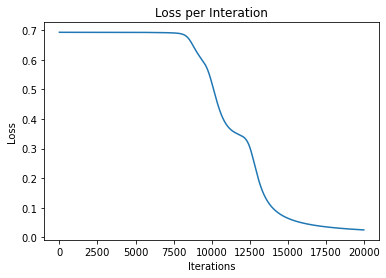

In [25]:
# Fitting prameters / training of circle dataset
fit_params = model3.fit(x_train_circ, y_train_circ, num_iterations=20000, learning_rate=0.2, hidden_layer=4)

loss after iteration 0: 0.692883
loss after iteration 100: 0.608590
loss after iteration 200: 0.174889
loss after iteration 300: 0.079937
loss after iteration 400: 0.051989
loss after iteration 500: 0.039168
loss after iteration 600: 0.031862
loss after iteration 700: 0.027141
loss after iteration 800: 0.023829
loss after iteration 900: 0.021368
loss after iteration 1000: 0.019459
loss after iteration 1100: 0.017926
loss after iteration 1200: 0.016664
loss after iteration 1300: 0.015601
loss after iteration 1400: 0.014690
loss after iteration 1500: 0.013897
loss after iteration 1600: 0.013198
loss after iteration 1700: 0.012576
loss after iteration 1800: 0.012017
loss after iteration 1900: 0.011509
loss after iteration 2000: 0.011047
loss after iteration 2100: 0.010622
loss after iteration 2200: 0.010230
loss after iteration 2300: 0.009867
loss after iteration 2400: 0.009528
loss after iteration 2500: 0.009212
loss after iteration 2600: 0.008916
loss after iteration 2700: 0.008638
loss

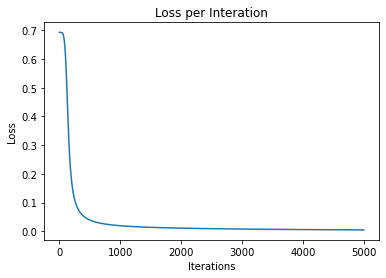

In [26]:
# Fitting prameters / training of blob dataset
fit_params1 = model4.fit(x_train, y_train, num_iterations=5000, learning_rate=0.2, hidden_layer=4)

In [27]:
# Predicting on test / val 
preds = model3.predict(fit_params, x_val_circ)
preds_blobs = model4.predict(fit_params1, x_val)
preds_circles = model3.predict(fit_params, x_test_circ)

In [28]:
accuracy = accuracy_score(y_val_circ.reshape(len(y_val_circ[0]),), preds.reshape(len(y_val_circ[0]),))
accuracy1 = accuracy_score(y_val.reshape(len(y_val[0]),), preds_blobs.reshape(len(y_val[0]),))

In [29]:
accuracy2 = accuracy_score(y_test_circ.reshape(len(y_test_circ[0]),), preds_circles.reshape(len(y_test_circ[0]),))

In [30]:
print("Accuracy of shallow neural net on validation set of circles dataset", accuracy*100)
print("Accuracy of shallow neural net on validation set of blobs dataset", accuracy1*100)
print("Accuracy of shallow neural net on test set of circles dataset", accuracy2*100)

Accuracy of shallow neural net on validation set of circles dataset 98.88888888888889
Accuracy of shallow neural net on validation set of blobs dataset 100.0
Accuracy of shallow neural net on test set of circles dataset 100.0


## Task 4 : Logistic Regression with Shallow NN for classification of Images --- (Airplane and Horse)

### Please note - 
1. I have taken the data loading code completely which was provided with assignment by Prof. Michael Madden, all the comments from that code is removed after understanding.
2. Results and observations for this task is given at the end of the task, as I think it is more suitable.

In [31]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [32]:
def loadbatch(batchname):
    folder = 'E:\College Wiki\Deep Learning\Assignment 1\\cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [33]:
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [34]:
import matplotlib.pyplot as plt

def visualise(data, index):
    picture = data[index]
    picture.shape = (3,32,32) 
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [35]:
batch1 = loadbatch('data_batch_1') # Loading the batch 1 of images 
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [36]:
data = batch1[b'data'] #extracting data from the batch
labels = batch1[b'labels'] #extracting labels from the batch
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


In [37]:
r_channel = data[:,:1024] #Taking all the Red value of the data
labels_img = np.array([labels]) # Storing the labels in an np array to use it as feature vector
labels_img = labels_img.T # Transposing the labels so that we can concatenate the data 

#Conccatenating the data from labesl and red channel
data = np.append(r_channel, labels_img, axis = 1) 

#Filtering the data of given classes (Airplane and Horse)
airplanes = data[data[:,-1] == 0]
horses = data[data[:,-1] == 7]
horses[:,[-1]] = 1 # COnverting the label '7' to '1' to work with logistic regression

dataset_img = np.concatenate((airplanes, horses), axis=0) #Concatenating both the classes together to create whole dataset 


In [38]:
dataset_img

array([[202, 202, 204, ..., 239, 240,   0],
       [126, 122, 126, ..., 126, 121,   0],
       [251, 247, 247, ..., 112, 105,   0],
       ...,
       [247, 241, 247, ..., 166, 172,   1],
       [121, 126, 142, ..., 138, 133,   1],
       [108, 110, 115, ..., 226, 227,   1]])

In [39]:
Y = dataset_img[:,[-1]] # Storing labels in Y
X = np.delete(dataset_img, -1, 1) # Storing features in X

In [40]:
#Splitting the dataset in train - test - validations dataset as 70 - 15 -1 5 percent respectively
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [41]:
#Reshaping the datasets with transpose for matrix multiplications during updating weights and activation functions 
x_train = x_train.T
y_train = y_train.reshape(1, x_train.shape[1])
x_test = x_test.T
y_test = y_test.reshape(1, x_test.shape[1])
x_val = x_val.T
y_val = y_val.reshape(1, x_val.shape[1])

In [42]:
print("Shape of X_train : ", x_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", x_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (1024, 1404)
Shape of Y_train :  (1, 1404)
Shape of X_test :  (1024, 301)
Shape of Y_test :  (1, 301)


loss after iteration 0: 0.693188
loss after iteration 100: 0.683742


<ipython-input-23-2f502830c066>:14: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-X))


loss after iteration 200: 0.680539
loss after iteration 300: 0.683483
loss after iteration 400: 0.682039
loss after iteration 500: 0.659028
loss after iteration 600: 0.659498
loss after iteration 700: 0.656210
loss after iteration 800: 0.650647
loss after iteration 900: 0.668799
loss after iteration 1000: 0.643472


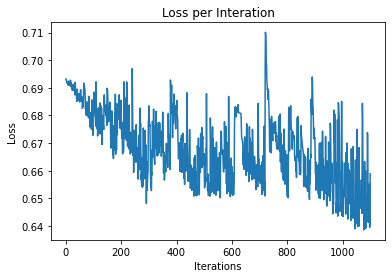

In [47]:
modelimg = shallowLogisticRegression()
# Fitting prameters / training of circle dataset
fit_params_img = modelimg.fit(x_train, y_train, num_iterations=1100, learning_rate=0.1, hidden_layer=8)

In [48]:
preds_img = modelimg.predict(fit_params_img, x_test)
accuracy = accuracy_score(y_test.reshape(len(y_test[0]),), preds_img.reshape(len(y_test[0]),))

<ipython-input-23-2f502830c066>:14: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-X))


In [56]:
print("Accuracy of LR with Shalow NN on test data of given images", round((accuracy*100),2))

Accuracy of LR with Shalow NN on test data of given images 59.47


In [50]:
preds_img = modelimg.predict(fit_params_img, x_val)
accuracy = accuracy_score(y_val.reshape(len(y_val[0]),), preds_img.reshape(len(y_val[0]),))

<ipython-input-23-2f502830c066>:14: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-X))


In [57]:
print("Accuracy of LR with Shalow NN on validation data of given images",round((accuracy*100),2))

Accuracy of LR with Shalow NN on validation data of given images 59.47


### Results and Observations :
1. The dataset here is run with 8 hidden layers, double the number of previous with way less number of iterations at 1100 with learning rate of 0.1.
2. The accuracy is on validation set is at 59.47% which not the best as expected by shallow net on images but slightly higher than random distribution.
3. The hyperparameters are tuned after multiple runs on test data.
4. It was observed that with higher number of iterations the loss was increasing and causing less accuracy.

## Task 5 : Improvements in the Neural Network

### Development of CNN
1. As we want to increase accuracy on images best way is to use CNN
2. We can develop a convolutional neural network by adding a convultional layer and a pooling layer which may give us better accuracy.
3. Tried to develope the same, but couldn't do it in time. Developing feature maps from scratch is difficult.